In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [123]:
file_path = r'C:\Users\akp\Downloads\most_subscribed_youtube_channels.csv'

In [124]:
df = pd.read_csv(file_path)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [126]:
df.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [127]:
cols_to_convert = ['subscribers', 'video views', 'video count']

for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').astype(int)

In [128]:
df['category'].fillna('Unknown', inplace=True)

In [129]:
print("\nUpdated Data Types:")
print(df.dtypes)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Updated Data Types:
rank            int64
Youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

Missing Values After Cleaning:
rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64


In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['subscribers'].quantile(0.25)
Q3 = df['subscribers'].quantile(0.75)
IQR = Q3 - Q1  

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['subscribers'] < lower_bound) | (df['subscribers'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
     rank                    Youtuber  subscribers   video views  video count  \
0      1                    T-Series    222000000  198459090822        17317   
1      2              YouTube Movies    154000000             0            0   
2      3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
3      4                   SET India    139000000  125764252686        91271   
4      5                       Music    116000000             0            0   
..   ...                         ...          ...           ...          ...   
75    76                     Shakira     37200000   23715669906          287   
76    77             Kimberly Loaiza     37200000    4254148920          206   
77    78           WorkpointOfficial     37000000   33773658170        62039   
78    79                Daddy Yankee     36800000   20479831396          423   
79    80             Toys and Colors     36500000   40932580174          821   

            category  starte

In [130]:
# Display basic information
print("Dataset Info:")
print(df.info())

# Show first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Shape of the dataset
print("\nDataset Shape:", df.shape) 



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   int64 
 3   video views  1000 non-null   int64 
 4   video count  1000 non-null   int64 
 5   category     1000 non-null   object
 6   started      1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB
None

First 5 Rows:
   rank                    Youtuber  subscribers   video views  video count  \
0     1                    T-Series    222000000  198459090822        17317   
1     2              YouTube Movies    154000000             0            0   
2     3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
3     4                   SET India    139000000  125764252686        91271   
4     5                       Music    1160000

In [11]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check unique values in categorical columns
print("\nCategory Distribution:")
print(df['category'].value_counts())



Summary Statistics:
              rank   subscribers   video views    video count      started
count  1000.000000  1.000000e+03  1.000000e+03    1000.000000  1000.000000
mean    500.500000  2.051940e+07  9.197025e+09    8551.059000  2012.376000
std     288.819436  1.578167e+07  1.207128e+10   29359.950431     3.998076
min       1.000000  1.090000e+07  0.000000e+00       0.000000  1970.000000
25%     250.750000  1.260000e+07  3.582208e+09     342.250000  2010.000000
50%     500.500000  1.550000e+07  6.116574e+09     856.000000  2013.000000
75%     750.250000  2.210000e+07  1.124951e+10    3060.500000  2015.000000
max    1000.000000  2.220000e+08  1.984591e+11  329711.000000  2021.000000

Category Distribution:
category
Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Unknown   

In [131]:
num_cols = ['subscribers', 'video views', 'video count', 'started']
df = df[df['started'] >= 2005] 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

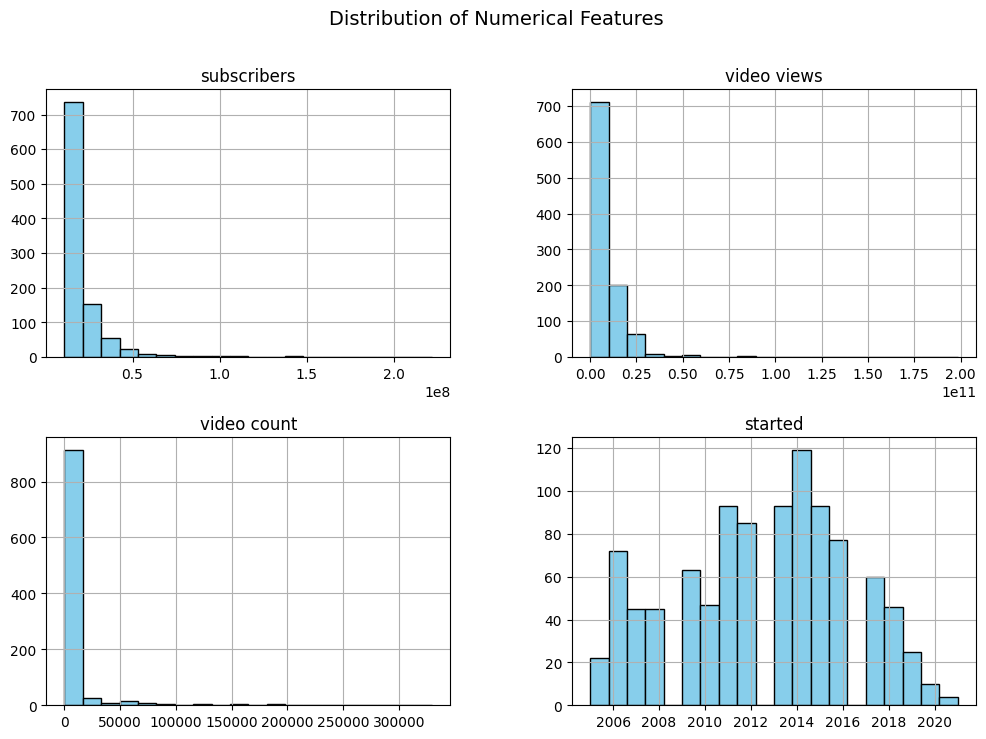

In [13]:
# Plot histograms
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

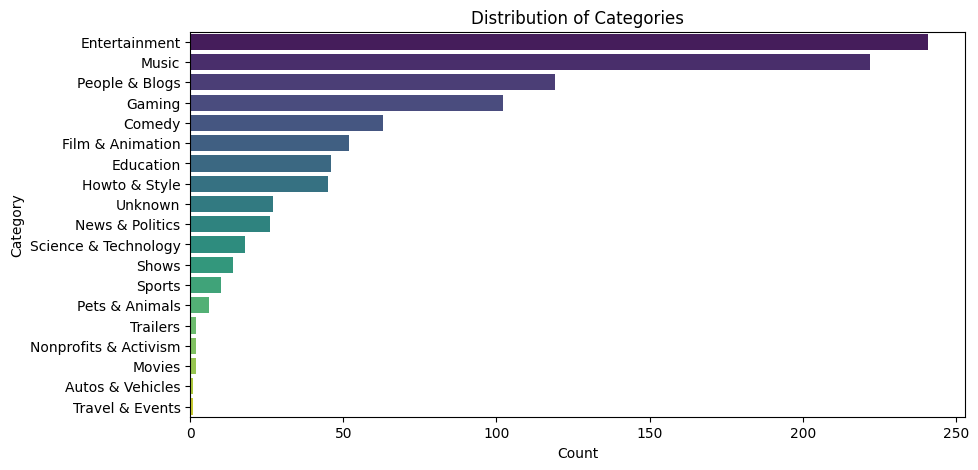

In [14]:
#Visualise the distribution of categorical features

plt.figure(figsize=(10, 5))
sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of Categories")
plt.show()


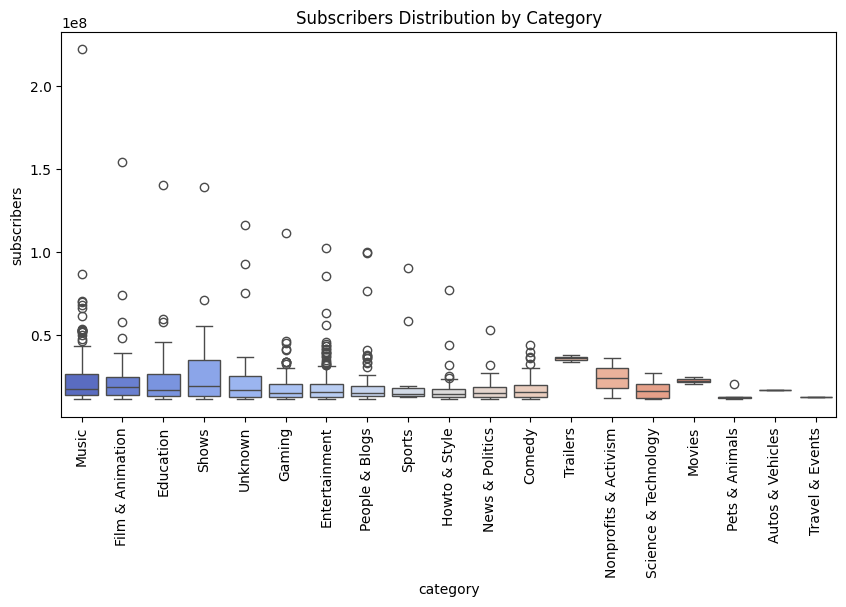

In [15]:
#Box plot

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['category'], y=df['subscribers'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Subscribers Distribution by Category")
plt.show()


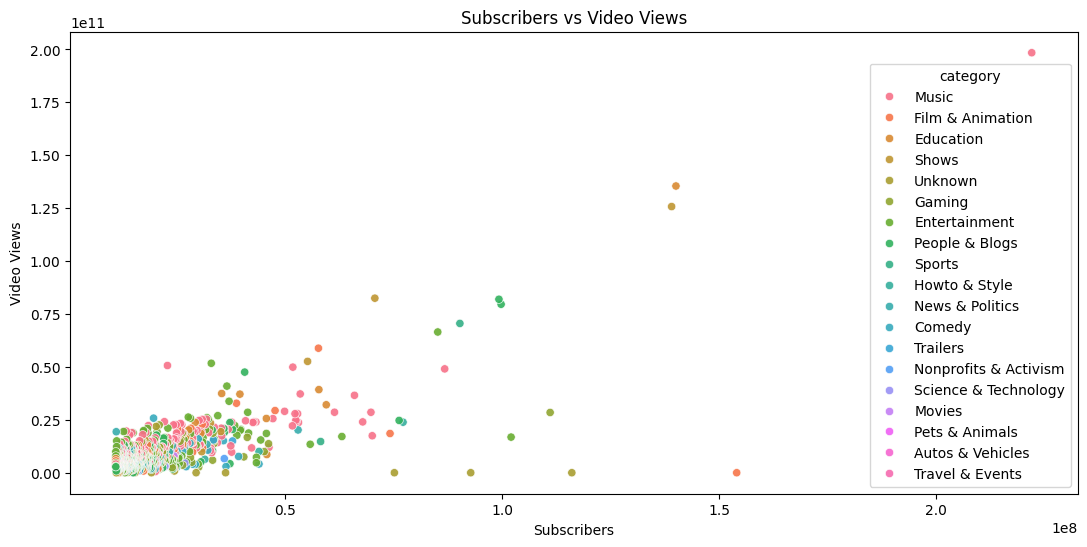

In [16]:
#Explore relationships between variables using scatter plots or correlation matrices

plt.figure(figsize=(13, 6))
sns.scatterplot(x=df['subscribers'], y=df['video views'], hue=df['category'], alpha=0.9)
plt.xlabel("Subscribers")
plt.ylabel("Video Views")
plt.title("Subscribers vs Video Views")
plt.show()


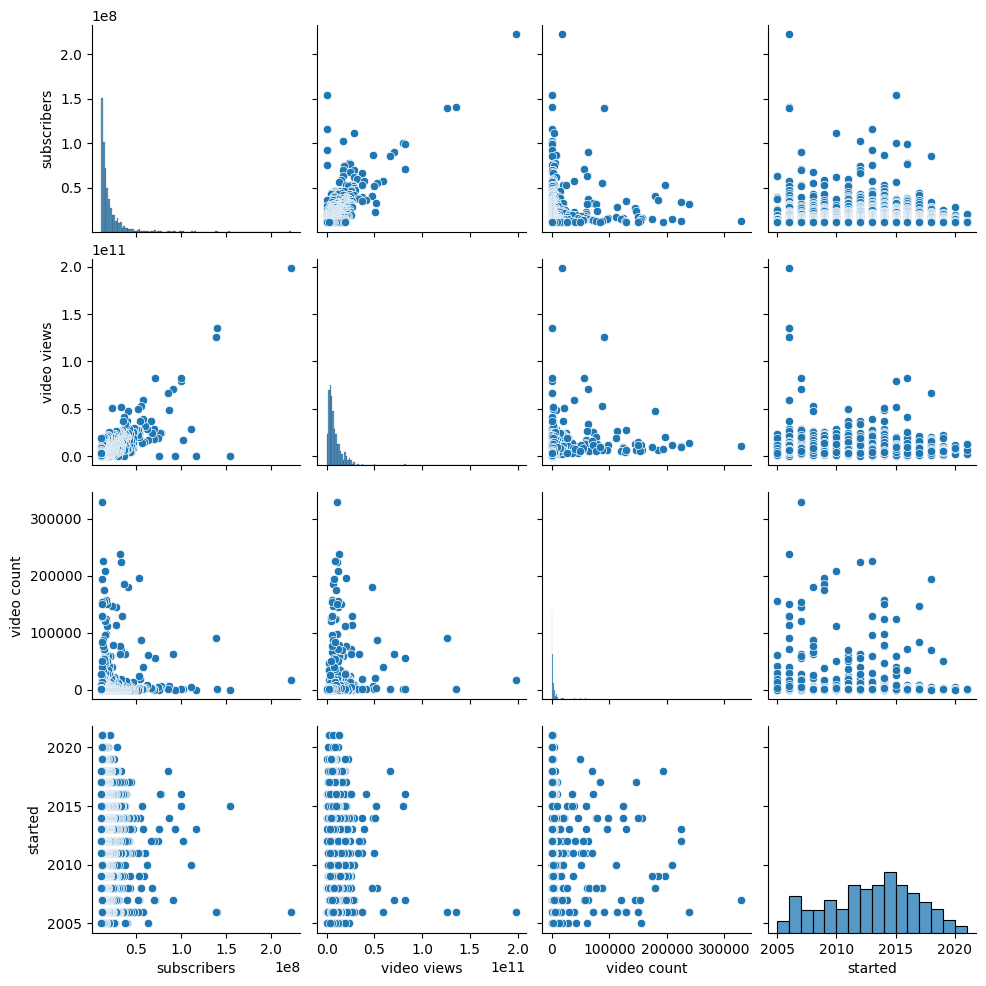

In [17]:
# Employ Seaborn to create more advanced visualisations like pairplots, heatmaps, etc.

sns.pairplot(df[num_cols])
plt.show()


In [19]:
#Questions:

1
-

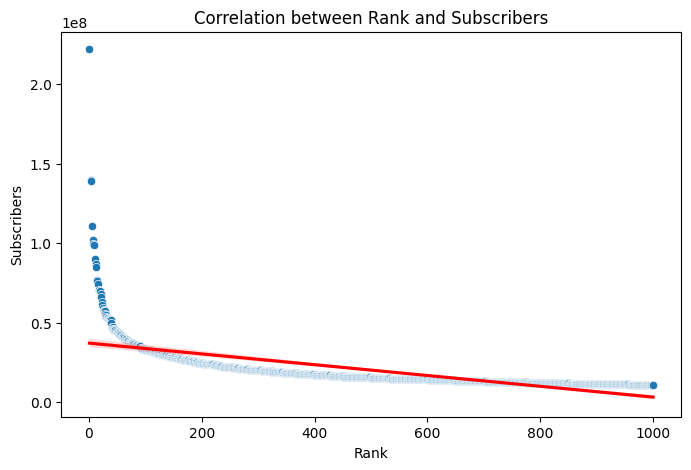

Correlation between Rank and Subscribers: -0.66


In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['rank'], y=df['subscribers'])
sns.regplot(x=df['rank'], y=df['subscribers'], scatter=False, color='red')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.title('Correlation between Rank and Subscribers')
plt.show()


# Correlation analysis
correlation = df['rank'].corr(df['subscribers'])
print(f"Correlation between Rank and Subscribers: {correlation:.2f}")

2
-

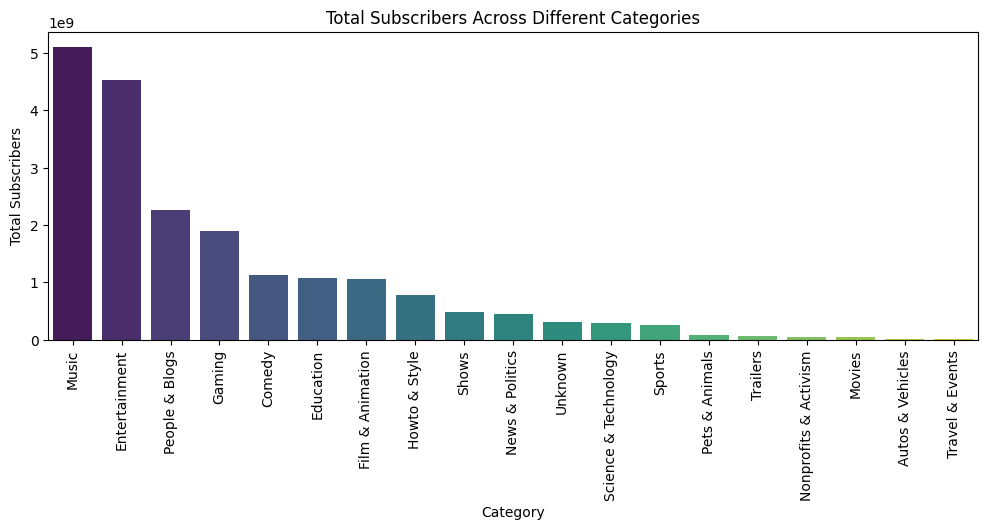

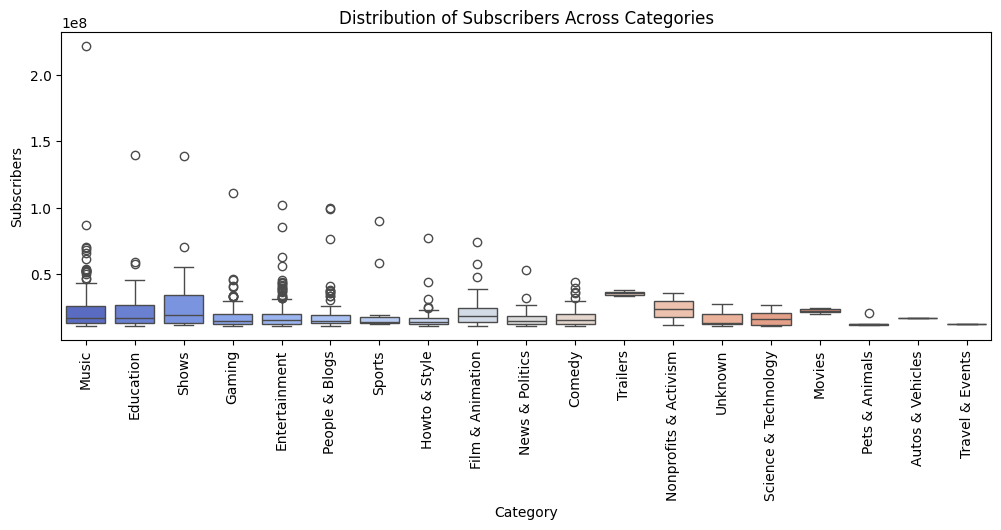

In [54]:

# Group by category and calculate total & average subscribers
category_subs = df.groupby('category')['subscribers'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

# Plot bar chart - Total Subscribers per Category
plt.figure(figsize=(12,4))
sns.barplot(x=category_subs.index, y=category_subs['sum'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers Across Different Categories')
plt.show()

# Boxplot - Distribution of Subscribers in Each Category
plt.figure(figsize=(12,4))
sns.boxplot(x=df['category'], y=df['subscribers'], palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.title('Distribution of Subscribers Across Categories')
plt.show()


3
-

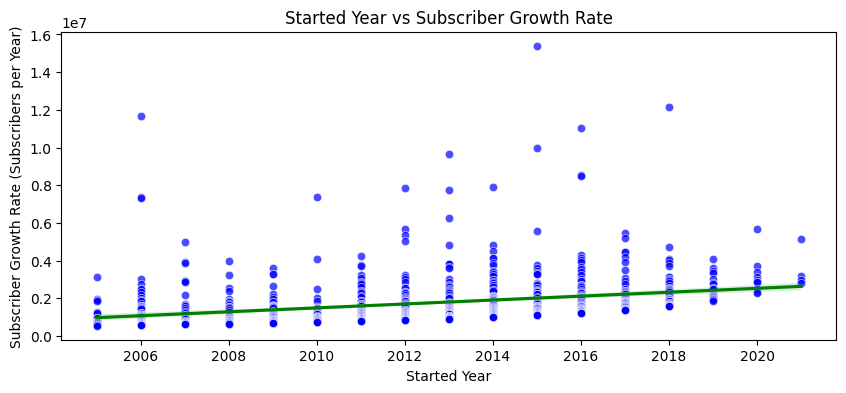

In [22]:

from datetime import datetime

current_year = datetime.now().year
df['years_active'] = current_year - df['started']
df = df[df['years_active'] > 0]
df['growth_rate'] = df['subscribers'] / df['years_active']

# Scatter plot: Started Year vs Growth Rate
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['started'], y=df['growth_rate'], alpha=0.7, color='blue')
sns.regplot(x=df['started'], y=df['growth_rate'], scatter=False, color='green')
plt.xlabel('Started Year')
plt.ylabel('Subscriber Growth Rate (Subscribers per Year)')
plt.title('Started Year vs Subscriber Growth Rate')
plt.show()


Yes, newer channels tend to grow faster in terms of subscribers per year.
This could be due to the increased audience size, better platform algorithms, and more engagement strategies in recent years.

4
-

In [52]:
#Identify the top 3 ranked channels within each category

top_channels = df.groupby('category').apply(lambda x: x.nsmallest(3, 'rank'))
top_channels = top_channels.reset_index(drop=True)  # Reset index

consistent_top_channels = top_channels['Youtuber'].value_counts()
multi_category_top_channels = consistent_top_channels[consistent_top_channels > 1]

print("Top 3 Ranked Channels Per Category:")
print(top_channels[['category', 'rank', 'Youtuber']])

Top 3 Ranked Channels Per Category:
                 category  rank                                     Youtuber
0        Autos & Vehicles   433                                 DUDU e CAROL
1                  Comedy    51                             whinderssonnunes
2                  Comedy    67                             Luisito Comunica
3                  Comedy    81                                  CarryMinati
4               Education     3                   Cocomelon - Nursery Rhymes
5               Education    25  Pinkfong Baby Shark - Kids' Songs & Stories
6               Education    27        ChuChu TV Nursery Rhymes & Kids Songs
7           Entertainment     7                                      MrBeast
8           Entertainment    13                                Vlad and Niki
9           Entertainment    23                                       Zee TV
10       Film & Animation    17                                    Goldmines
11       Film & Animation    28         

4
-

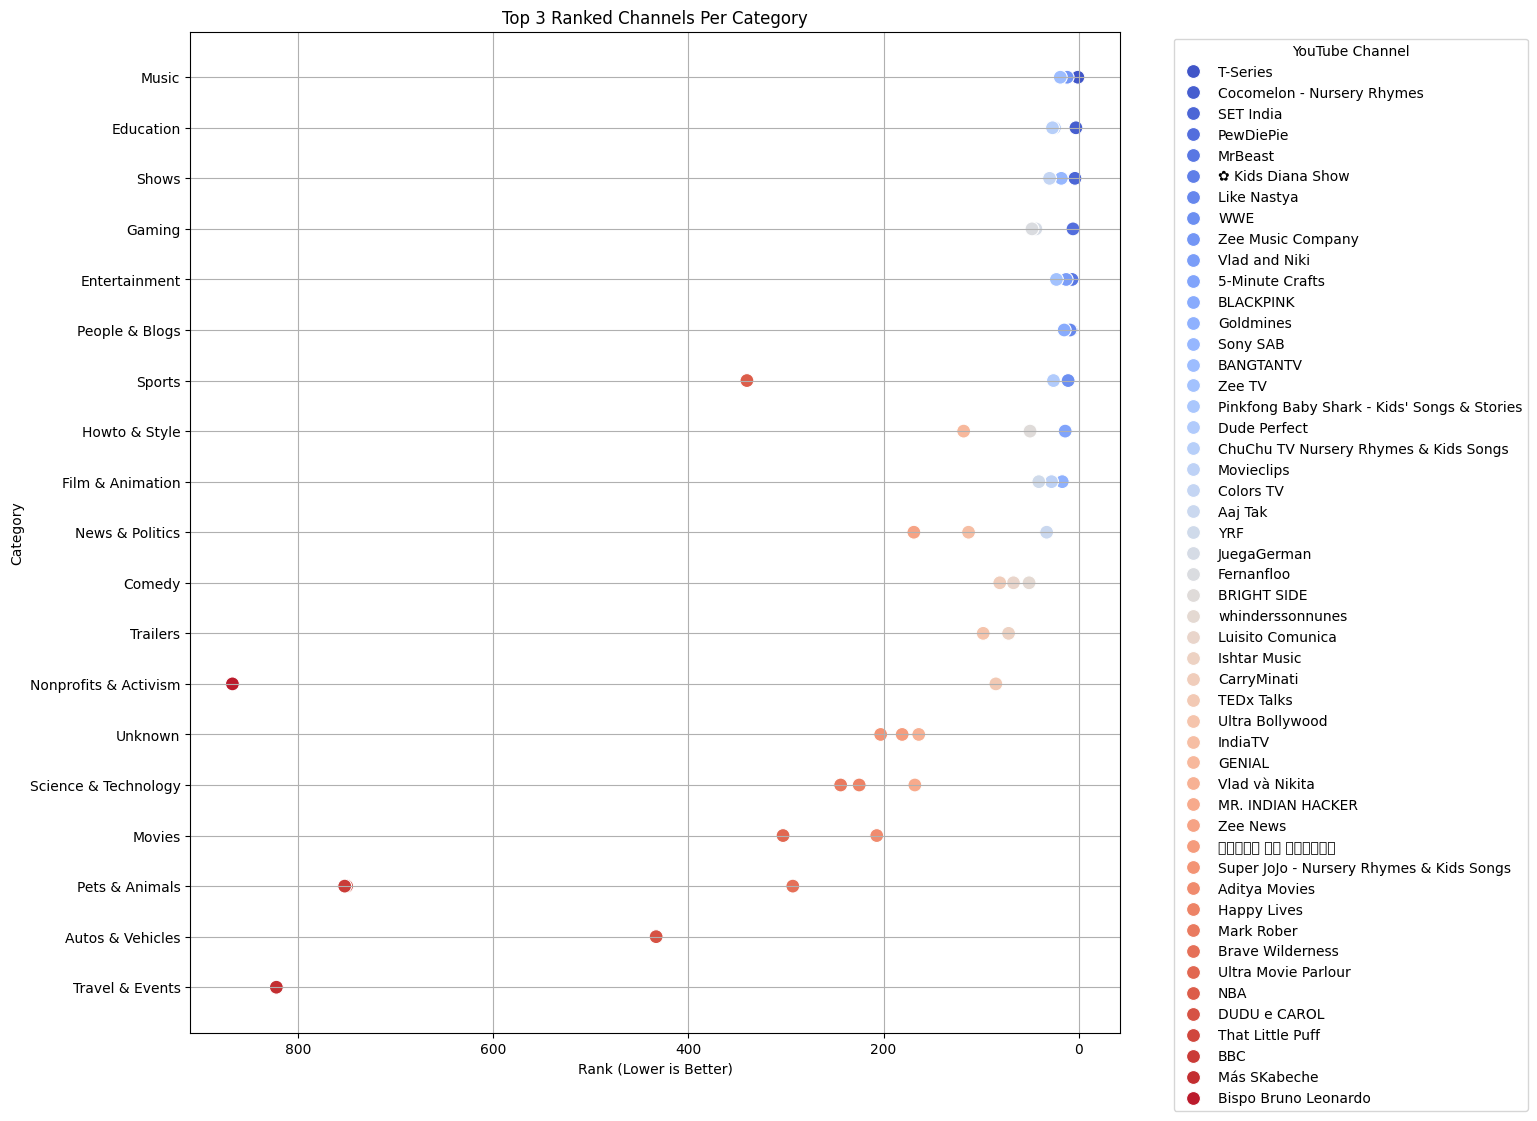

In [61]:
plt.figure(figsize=(12, 13))
sns.scatterplot(data=top_channels, x="rank", y="category", hue="Youtuber", s=100, palette="coolwarm")

plt.xlabel("Rank (Lower is Better)")
plt.ylabel("Category")
plt.title("Top 3 Ranked Channels Per Category")
plt.gca().invert_xaxis()  # Lower rank is better
plt.legend(title="YouTube Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


5
-

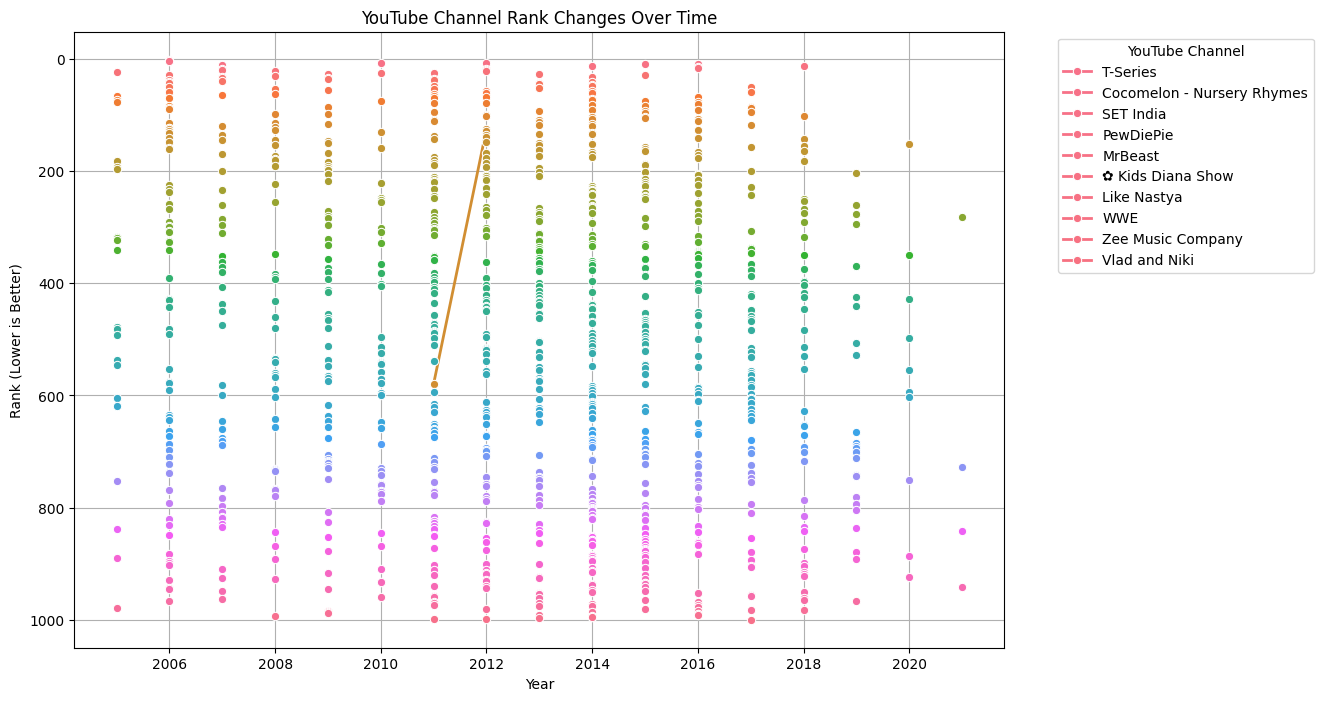

In [75]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df, x="started", y="rank", hue="Youtuber", marker="o", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Rank (Lower is Better)")
plt.title("YouTube Channel Rank Changes Over Time")
plt.gca().invert_yaxis()  
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], title="YouTube Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

6
-

Correlation between Video Count and Subscribers: 0.06


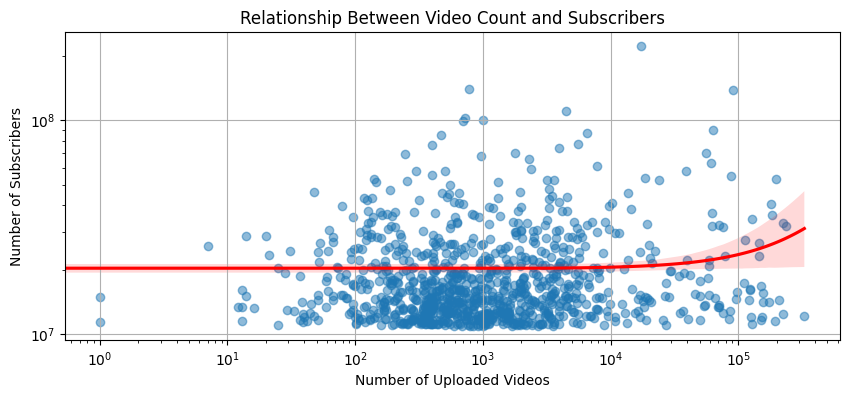

In [26]:
correlation = df[['video count', 'subscribers']].corr().iloc[0, 1]
print(f"Correlation between Video Count and Subscribers: {correlation:.2f}")

plt.figure(figsize=(10, 4))
sns.regplot(data=df, x='video count', y='subscribers', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel("Number of Uploaded Videos")
plt.ylabel("Number of Subscribers")
plt.title("Relationship Between Video Count and Subscribers")
plt.xscale('log')  
plt.yscale('log')
plt.grid(True)
plt.show()

Correlation Value: 0.06
This indicates a very weak relationship between the number of uploaded videos and the number of subscribers.
It suggests that simply uploading more videos does not strongly impact subscriber count.

7
-

In [28]:
category_avg_views = df.groupby('category')['video views'].mean().sort_values(ascending=False)

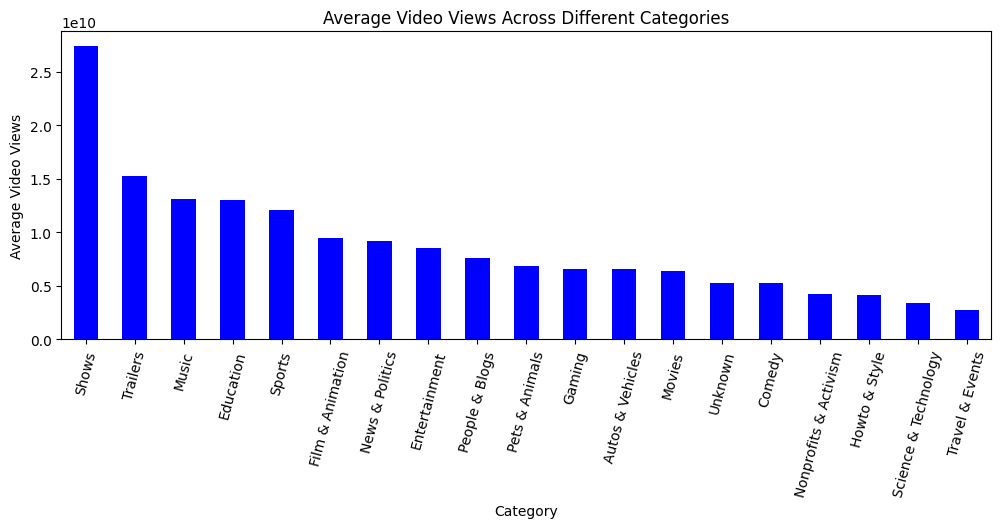

In [29]:
plt.figure(figsize=(12, 4))
category_avg_views.plot(kind='bar', color='blue')
plt.xlabel("Category")
plt.ylabel("Average Video Views")
plt.title("Average Video Views Across Different Categories")
plt.xticks(rotation=75)
plt.show()

Conclusion:

Highest Average Views:
The "Shows" category dominates in average video views, indicating that serialized or episodic content performs exceptionally well.
"Trailers" and "Music" also receive high engagement, likely due to their broad audience appeal and rewatch value.

Moderate Engagement Categories:
"Education", "Sports", and "Film & Animation" maintain strong viewership, suggesting a stable demand for informative and entertainment-driven content.

Lower Average Views:
Categories such as "Nonprofits & Activism", "Science & Technology", and "Travel & Events" have significantly lower engagement.
This could be due to a niche audience, lower frequency of uploads, or lesser promotion.

8
-

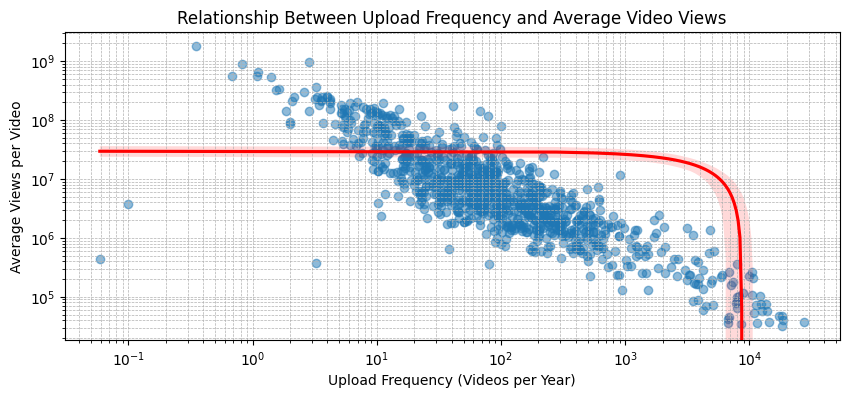

In [30]:
df = df[df['video count'] > 0]  
df['upload frequency'] = df['video count'] / (2025 - df['started'])
df['avg views per video'] = df['video views'] / df['video count']

# Scatter Plot
plt.figure(figsize=(10, 4))
sns.regplot(x=df['upload frequency'], y=df['avg views per video'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Upload Frequency (Videos per Year)")
plt.ylabel("Average Views per Video")
plt.title("Relationship Between Upload Frequency and Average Video Views")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Channels with fewer uploads per year tend to get higher average views per video.
Channels that upload frequently (high upload frequency) generally have lower average views per video.
This might indicate that quality over quantity plays a role in viewership.

9
-

In [32]:
df['started'] = pd.to_datetime(df['started'], format='%Y')
top_100 = df.sort_values(by=['rank']).groupby('started').head(100)

category_distribution = top_100.groupby(['started', 'category']).size().unstack(fill_value=0)

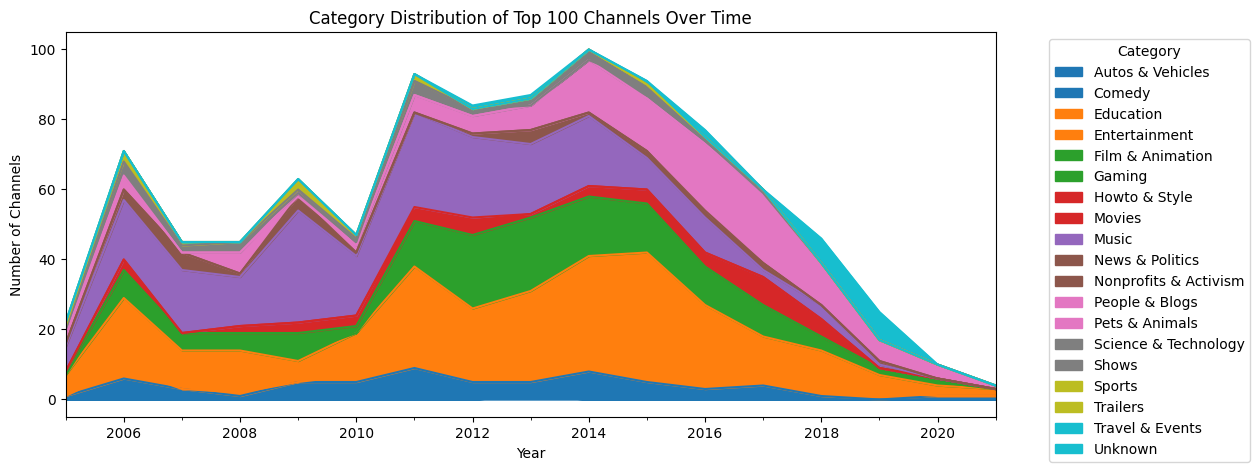

In [33]:
# Plot the category distribution over time
category_distribution.plot(kind='area', stacked=True, figsize=(12, 5), colormap='tab10')

plt.title('Category Distribution of Top 100 Channels Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Gaming, Education, and Tech-related channels saw notable growth over time.
Traditional Entertainment (TV, movies) gradually lost dominance to independent creators.
People & Blogs remained relatively stable, indicating continued interest in personal vlogs and influencer-driven content.

10
-
Identify the top 10 videos with the highest video views within each category. Analyse any commonalities or patterns among these high-performing videos.

since,Video titles or descriptions (to analyze commonalities and patterns) is not available in dataset.we cannot analyse it.

11
-

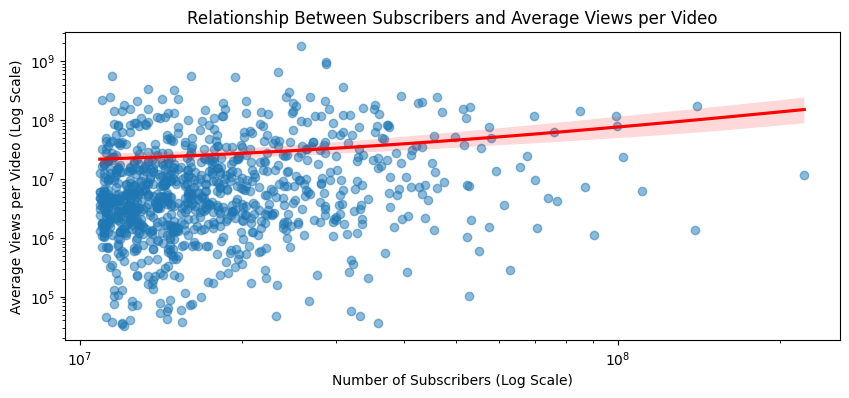

In [34]:
df['avg_views_per_video'] = df['video views'] / df['video count']

plt.figure(figsize=(10, 4))
sns.regplot(x=df['subscribers'], y=df['avg_views_per_video'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Subscribers (Log Scale)")
plt.ylabel("Average Views per Video (Log Scale)")
plt.title("Relationship Between Subscribers and Average Views per Video")

plt.show()

Takeaway: Subscriber count is an important but not the sole indicator of a channel’s success in terms of video views. 
Having more subscribers does not guarantee proportionally higher video views.

12
-

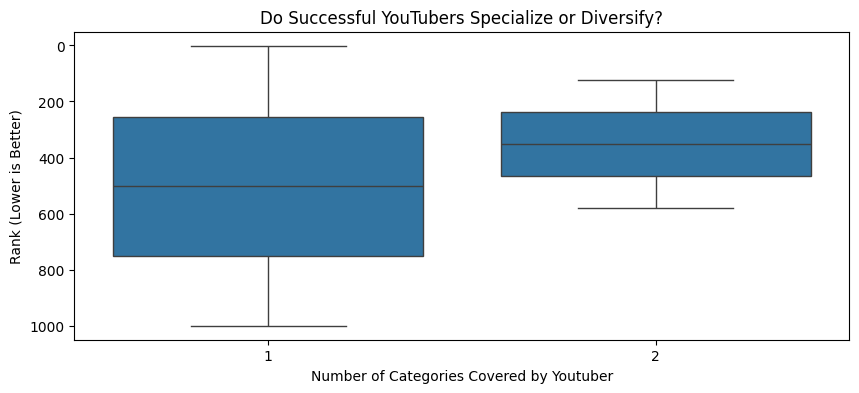

Correlation between category count and rank: -0.02


In [77]:
df_copy = df.copy()

category_count = df_copy.groupby("Youtuber")["category"].nunique().reset_index()
category_count.columns = ["Youtuber", "Category Count"]

df_copy = df_copy.merge(category_count, on="Youtuber", how="left")

plt.figure(figsize=(10, 4))
sns.boxplot(x="Category Count", y="rank", data=df_copy)
plt.xlabel("Number of Categories Covered by Youtuber")
plt.ylabel("Rank (Lower is Better)")
plt.title("Do Successful YouTubers Specialize or Diversify?")
plt.gca().invert_yaxis()  
plt.show()

correlation = df_copy[["Category Count", "rank"]].corr().iloc[0, 1]
print(f"Correlation between category count and rank: {correlation:.2f}")

Successful YouTubers can either specialize or diversify—there is no strong advantage for either.
 Some of the top-ranked YouTubers specialize in one category, but others succeed with multiple categories.

Correlation Analysis:
-
The correlation value (-0.02) is almost zero, meaning there is no strong relationship between the number of categories a YouTuber covers and their rank.
This implies that specialization vs. diversification doesn’t significantly impact ranking.

13
-

In [117]:
df = df[df['started'] >= 2005]
df.reset_index(drop=True, inplace=True)

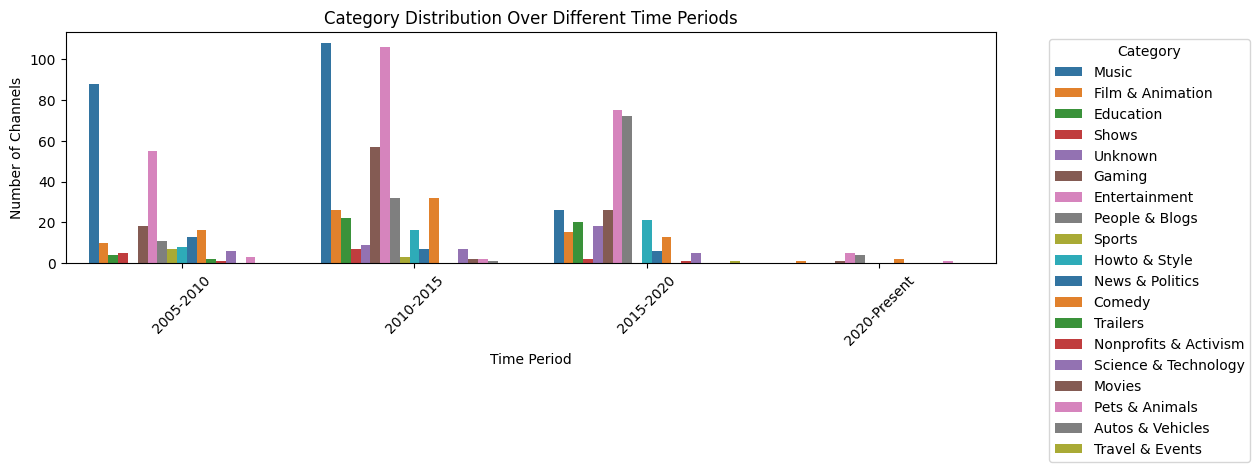

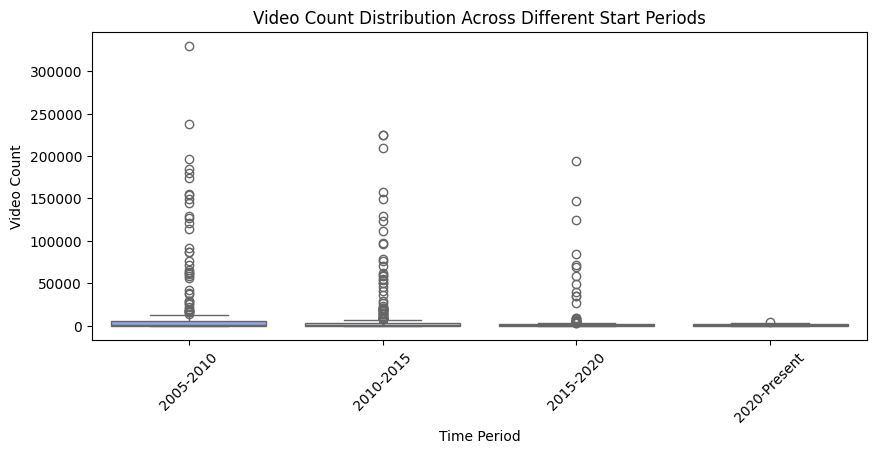

In [132]:
df['started'] = pd.to_numeric(df['started'], errors='coerce')

bins = [2005, 2010, 2015, 2020, 2025]
labels = ["2005-2010", "2010-2015", "2015-2020", "2020-Present"]

# Creating a new column for the time period
df['time_period'] = pd.cut(df['started'], bins=bins, labels=labels, right=False)

# --- 1. Category Distribution Over Time ---
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='time_period', hue='category', palette='tab10')
plt.title('Category Distribution Over Different Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- 2. Video Count Trends Over Time ---
plt.figure(figsize=(10, 4))
sns.boxplot(x='time_period', y='video count', data=df, palette="coolwarm")
plt.title('Video Count Distribution Across Different Start Periods')
plt.xlabel('Time Period')
plt.ylabel('Video Count')
plt.xticks(rotation=45)
plt.show()


Early YouTube (2005-2010): Focused heavily on Music & Entertainment.

Growth Phase (2010-2015): More categories emerged, with a peak in new channels.

Maturity Phase (2015-2020): Content diversification increased.

Recent Years (2020-Present): Fewer new channels, possibly due to competition and platform changes

Older channels have had more time to accumulate a large number of videos.

Most channels remain within a lower range, while a few dominant creators have an enormous number of videos.

Recent creators upload fewer videos on average, possibly due to changing content trends or increased competition.

14
--

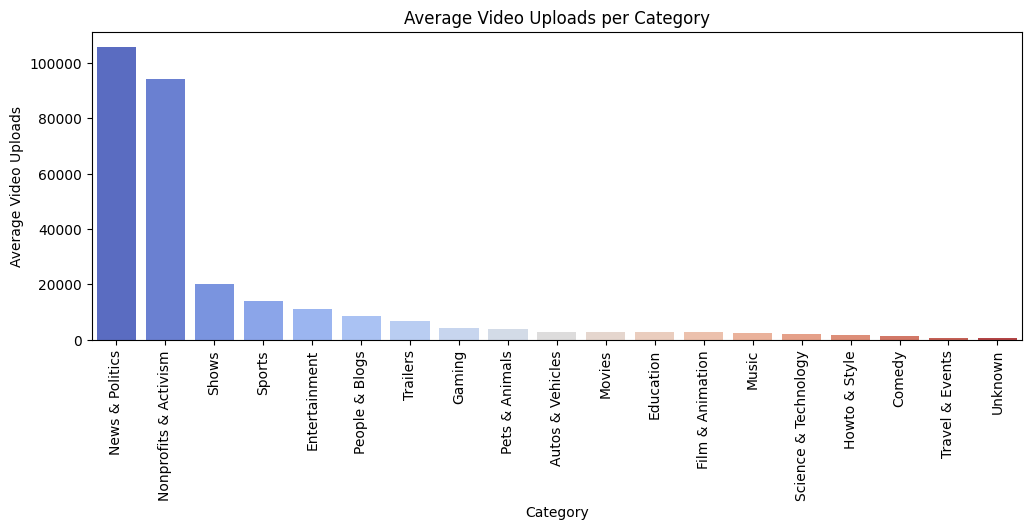

In [36]:
category_video_counts = df.groupby('category')['video count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(x=category_video_counts.index, y=category_video_counts.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Average Video Uploads")
plt.title("Average Video Uploads per Category")
plt.show()

Conclusion: Video Upload Frequency Across Categories
--------------------------------------------------------

1.News & Politics and Nonprofits & Activism have the highest average video uploads.
This makes sense as these categories often require frequent updates to stay relevant.

2.Shows, Sports, and Entertainment have moderate upload frequencies.
These categories balance content quality with regular uploads.

3.Categories like Science & Technology, Comedy, and Travel & Events have relatively fewer uploads.
Likely due to longer content production times and a focus on quality over quantity.


15
---

In [ ]:
df["started"] = pd.to_datetime(df["started"], errors="coerce")
df["started_year"] = df["started"].dt.year
df["channel_type"] = df["started_year"].apply(lambda x: "Early (Before 2010)" if x < 2010 else "Recent (2010 & Later)")

In [ ]:
comparison_df = df.groupby("channel_type")[["subscribers", "video views"]].mean().reset_index()

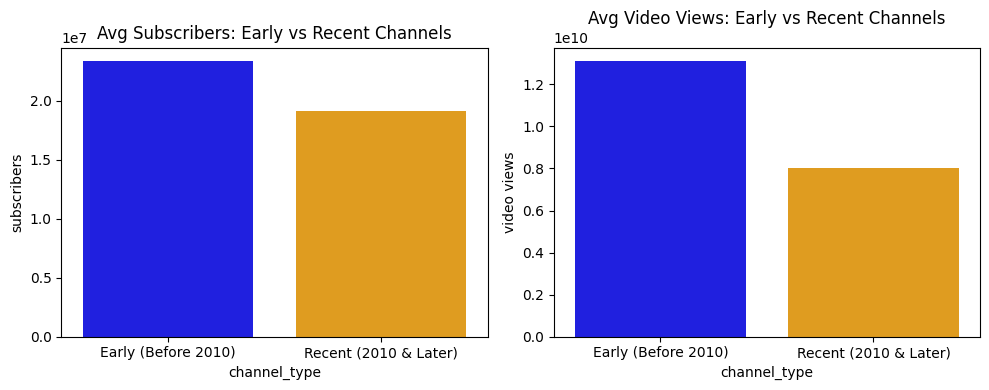

In [51]:
# Plot bar charts for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = {"Early (Before 2010)": "blue", "Recent (2010 & Later)": "orange"}
sns.barplot(x="channel_type", y="subscribers", palette=colors, data=comparison_df, ax=axes[0])
axes[0].set_title("Avg Subscribers: Early vs Recent Channels")

sns.barplot(x="channel_type", y="video views", palette=colors, data=comparison_df, ax=axes[1])
axes[1].set_title("Avg Video Views: Early vs Recent Channels")

plt.tight_layout()
plt.show()

Subscribers:
Older channels (Before 2010) have a higher average number of subscribers compared to more recent channels (2010 & later).
This suggests that early channels had more time to grow their audience and establish a strong subscriber base.

Video Views:
Channels that started before 2010 also have significantly higher average video views than newer channels.
This might be due to the early mover advantage, where older channels gained traction before YouTube became highly competitive.

16
---

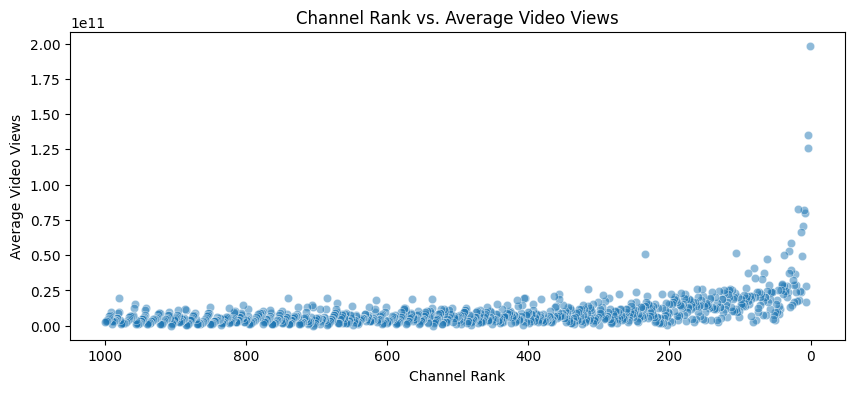

Correlation between Rank and Video Views: -0.46


In [38]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df["rank"], y=df["video views"], alpha=0.5)
plt.xlabel("Channel Rank")
plt.ylabel("Average Video Views")
plt.title("Channel Rank vs. Average Video Views")
plt.gca().invert_xaxis()  
plt.show()

# Calculate correlation
correlation = np.corrcoef(df["rank"], df["video views"])[0, 1]
print(f"Correlation between Rank and Video Views: {correlation:.2f}")

Higher-ranked channels generally get more views, but there are exceptions.
The correlation is moderate, meaning other factors also influence video views, such as content type, engagement, and virality.
There are some low-ranked channels with very high views, indicating that a channel doesn't necessarily need a top rank to get high viewership.

The correlation between channel rank and video views is -0.46, indicating a moderate negative relationship.
This means that higher-ranked channels (lower rank values) tend to have more views, but the relationship is not perfectly linear

17
---

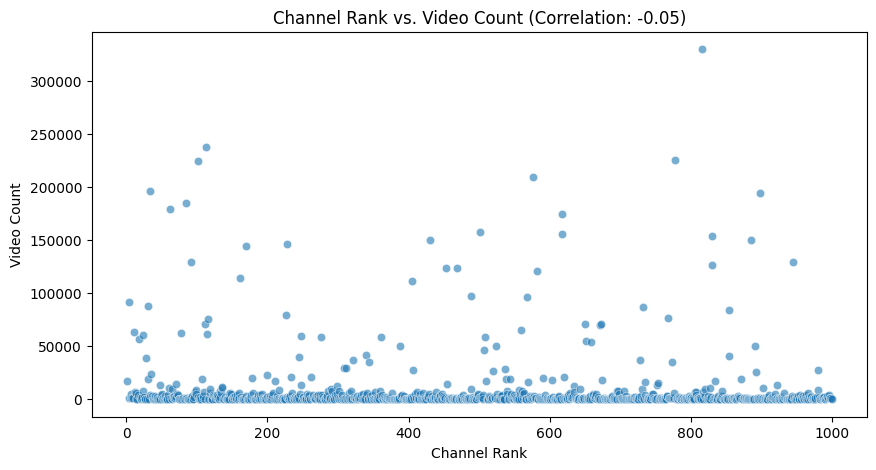

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["rank"], y=df["video count"], alpha=0.6)

# Correlation between Rank and Video Count
correlation = df["rank"].corr(df["video count"])

plt.title(f"Channel Rank vs. Video Count (Correlation: {correlation:.2f})")
plt.xlabel("Channel Rank")
plt.ylabel("Video Count")
plt.show()


This suggests that the number of uploaded videos alone is not a strong predictor of a channel’s ranking. 
Other factors, such as engagement, video quality, and content type, likely play a more significant role in determining rank.

18
---

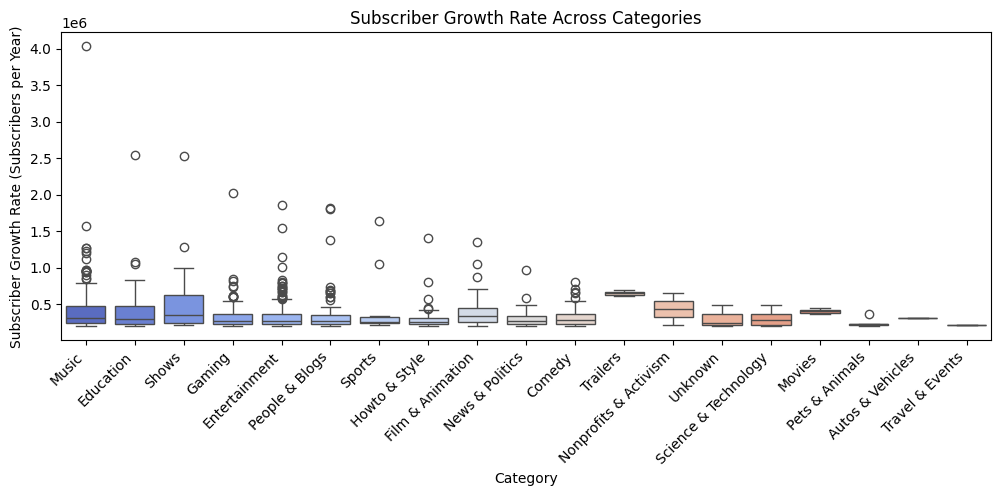

In [86]:
df["started"] = pd.to_datetime(df["started"], errors="coerce").dt.year
df["years_since_start"] = 2025 - df["started"]  
df["years_since_start"] = df["years_since_start"].replace(0, 1)

df["subscriber_growth_rate"] = df["subscribers"] / df["years_since_start"]

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="category", y="subscriber_growth_rate", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Subscriber Growth Rate Across Categories")
plt.xlabel("Category")
plt.ylabel("Subscriber Growth Rate (Subscribers per Year)")
plt.show()

Fastest Growing Categories:
------------------------------
Music, Education, Shows, and Gaming have the highest median subscriber growth rates.
These categories also have a wider spread, indicating significant variation among channels.
Outliers in these categories suggest that some channels experience explosive growth.
    
Moderate Growth Categories:
------------------------------
Entertainment, People & Blogs, Sports, and News & Politics have moderate growth rates.
Their median growth rates are lower than Music or Gaming, but still higher than niche categories.

Slowest Growing Categories:
------------------------------
Science & Technology, Movies, Pets & Animals, Autos & Vehicles, and Travel & Events show the lowest median growth rates.
These categories have less variation, indicating that most channels in these categories experience steady but slow growth.

Outliers and Variability:
-----------------------------
Categories like Shows, Gaming, and Education have a large number of high-growth outliers, suggesting that a few channels dominate.
Niche categories (e.g., Science & Technology, Travel & Events) have fewer extreme outliers, meaning most channels grow at a relatively slow and steady pace.

19
----

In [97]:
df['views_per_subscriber'] = df['video views'] / df['subscribers']

In [98]:
df['videos_per_year'] = df['video count'] / df['channel_age']

In [105]:
correlation_views_per_subscriber = df['channel_age'].corr(df['views_per_subscriber'])

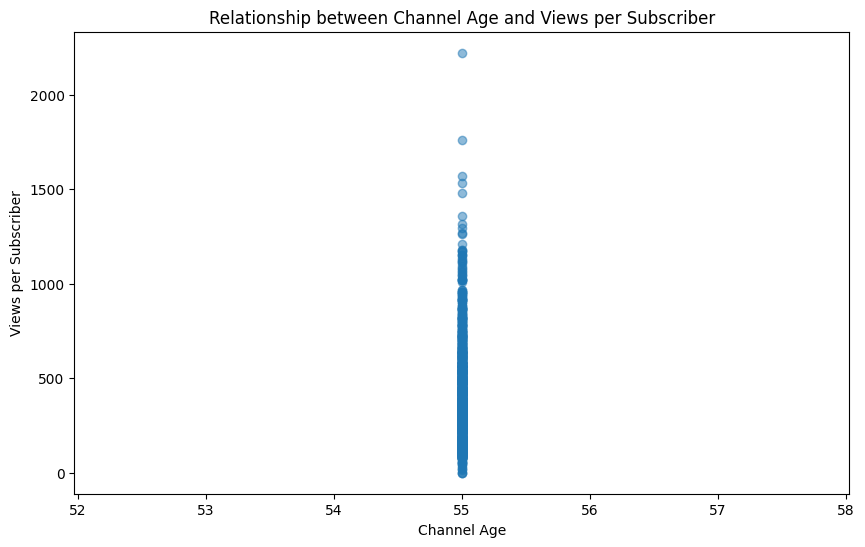

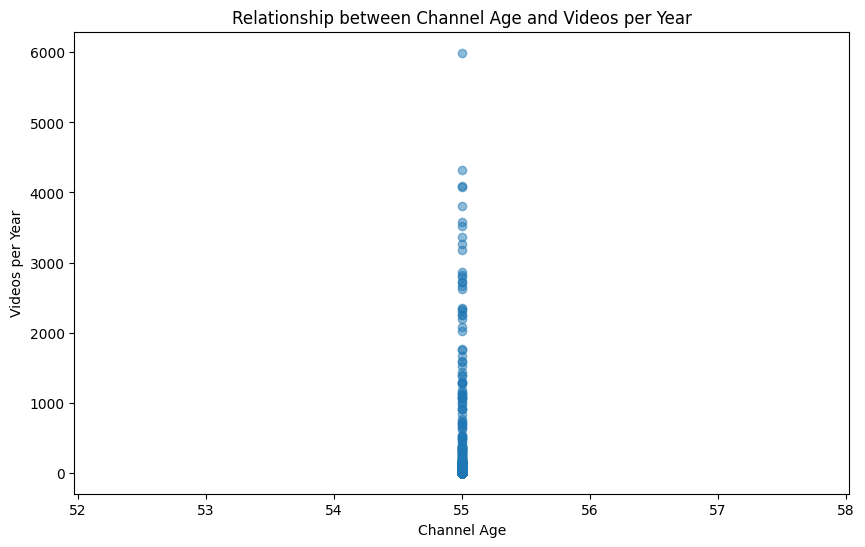

In [101]:
# Scatter plot for Views per Subscriber vs. Channel Age
plt.figure(figsize=(10, 6))
plt.scatter(df['channel_age'], df['views_per_subscriber'], alpha=0.5) 
plt.xlabel("Channel Age")
plt.ylabel("Views per Subscriber")
plt.title("Relationship between Channel Age and Views per Subscriber")
plt.show()

# Scatter plot for Videos per Year vs. Channel Age
plt.figure(figsize=(10, 6))
plt.scatter(df['channel_age'], df['videos_per_year'], alpha=0.5)  
plt.xlabel("Channel Age")
plt.ylabel("Videos per Year")
plt.title("Relationship between Channel Age and Videos per Year")
plt.show()

20
-

In [94]:
df['focused'] = df['category'].apply(lambda x: True if ',' not in x else False)

In [95]:
focused_channels = df[df['focused'] == True]
diverse_channels = df[df['focused'] == False]

# Average subscriber count for each group
avg_subscribers_focused = focused_channels['subscribers'].mean()
avg_subscribers_diverse = diverse_channels['subscribers'].mean()

# Average video views for each group
avg_views_focused = focused_channels['video views'].mean()
avg_views_diverse = diverse_channels['video views'].mean()

print("Average Subscribers for Focused Channels:", avg_subscribers_focused)
print("Average Subscribers for Diverse Channels:", avg_subscribers_diverse)
print("Average Video Views for Focused Channels:", avg_views_focused)
print("Average Video Views for Diverse Channels:", avg_views_diverse)

Average Subscribers for Focused Channels: 20147219.41354904
Average Subscribers for Diverse Channels: nan
Average Video Views for Focused Channels: 9296561434.643074
Average Video Views for Diverse Channels: nan


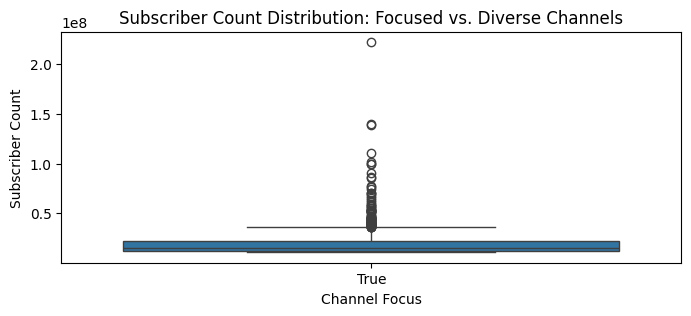

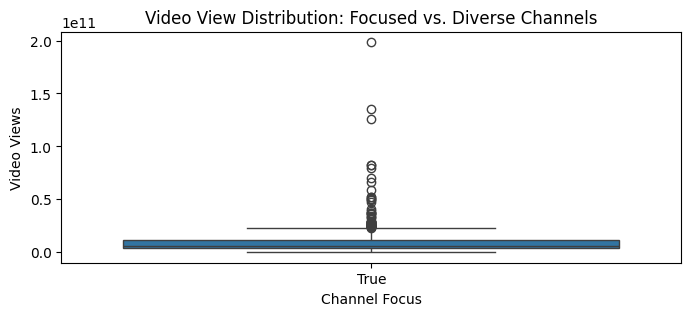

In [103]:
# Box plot of subscriber counts
plt.figure(figsize=(8, 3))
sns.boxplot(x='focused', y='subscribers', data=df)
plt.title('Subscriber Count Distribution: Focused vs. Diverse Channels')
plt.xlabel('Channel Focus')
plt.ylabel('Subscriber Count')
plt.show()

# Box plot of video views
plt.figure(figsize=(8, 3))
sns.boxplot(x='focused', y='video views', data=df)
plt.title('Video View Distribution: Focused vs. Diverse Channels')
plt.xlabel('Channel Focus')
plt.ylabel('Video Views')
plt.show()

Most channels, whether focused or diverse, have a relatively low subscriber count.
However, a few focused channels dominate with very high subscriber numbers, suggesting that focusing on a niche may lead to extreme success but is not guaranteed for all.

A few highly successful channels generate a majority of video views, while most channels receive relatively low engagement.
This follows a power law distribution, where a small percentage of creators capture most of the audience's attention.